# Exploratory Data Analysis Python & Sentiment Analysis
Yiting (Elle) Tsai (yt9mh@virginia.edu)<br>
DS 5001<br>
28 April 2020<br>

## Overview
1. Lemmatize document 
2. Create word cloud to get intuition of the word frequency in the corpus
3. Detect sentiment analysis to see the polarity with time series - NRC Emotional Lexicon, Textblob, vender
4. Caluclate Word frequency based on news article each day

## Sklearn package

In [8]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import re
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
FIG = dict(figsize=(25, 5), legend=True, fontsize=14)
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS 

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

In [12]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('tagsets')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize, RegexpTokenizer

[nltk_data] Downloading package punkt to /home/yt9mh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/yt9mh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/yt9mh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package tagsets to /home/yt9mh/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yt9mh/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /home/yt9mh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/yt9mh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [97]:
df = pd.read_csv('covid19_news.csv')
# df['doc_date'] = pd.to_datetime(df['doc_date'])
df.head()

,doc_content,doc_date,doc_id,doc_source,doc_title,doc_url,doc_lemma
0,By YANAN WANG and MIKE STOBBE\nBEIJING (AP) — ...,2020-01-08,983556,US News,Chinese Report Says Illnesses May Be From New ...,https://www.usnews.com/news/world/articles/202...,yanan wang mike stobbe beijing ( ap ) — prelim...
1,BEIJING (AP) — Health authorities in a central...,2020-01-10,985558,US News,China Reports 1st Death From New Type of Coron...,https://www.usnews.com/news/health-news/articl...,beijing ( ap ) — health authority central chin...
2,Here are some of the latest health and medical...,2020-01-13,987316,US News,"Health Highlights: Jan. 13, 2020",https://www.usnews.com/news/health-news/articl...,"late health medical news development , compile..."
3,Here are some of the latest health and medical...,2020-01-14,988361,US News,"Health Highlights: Jan. 14, 2020",https://www.usnews.com/news/health-news/articl...,"late health medical news development , compile..."
4,"By MARI YAMAGUCHI, Associated Press\nTOKYO (AP...",2020-01-16,989997,US News,Patient in Japan Confirmed as Having New Virus...,https://www.usnews.com/news/world/articles/202...,"mari yamaguchi , associate press tokyo ( ap ) ..."


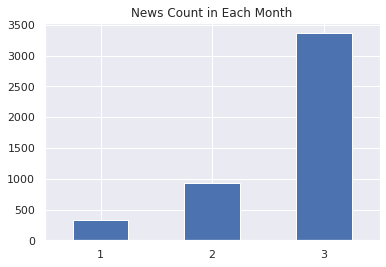

In [6]:
df['doc_date'].apply(lambda x: x.month).value_counts(sort = False).plot(kind= 'bar')
plt.xticks(rotation=0);
plt.title('News Count in Each Month');


### Word cloud

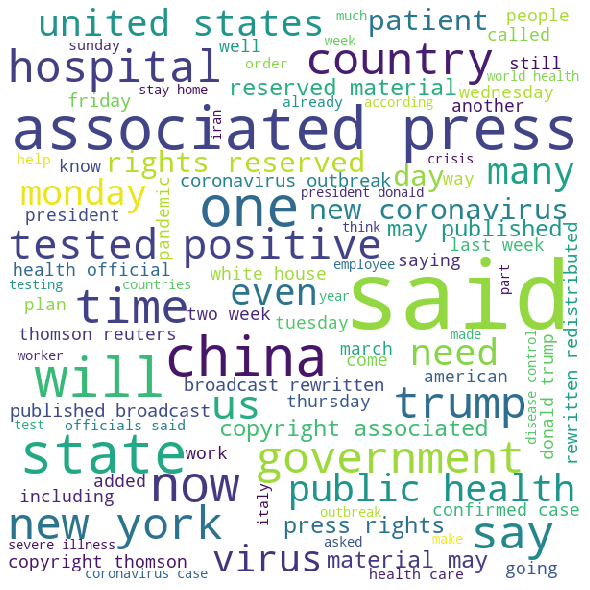

In [7]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df['doc_content']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Word cloud is created to present a visual representation of word frequency in the news. **Trump**, the **government** and **white house** show high frequency in the articles, which indicate the situation is extremely worse that the government needs to take action and announce to the public. **Right** and **reserved** also report often since the public are protesting their free rights for the situation that companies lock down and stay-at-home, social distance orders are reserved to the public. 


## Lemmatize

In [10]:
stop_words = set(stopwords.words('english')) # get stop words from nltk
tokenizer = nltk.RegexpTokenizer(r"\w+") # remove punctuation

In [27]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}


    return tag_dict.get(tag, wordnet.NOUN)



# df['doc_lemma'] = df['doc_content'].apply(lambda x: " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x.lower()) if w not in stop_words]))
df['title_lemma'] = df['doc_title'].apply(lambda x: " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x.lower()) if w not in stop_words]))



### Get word list

In [14]:
count_vect = CountVectorizer(lowercase = True)
content_counts = count_vect.fit_transform(df['doc_lemma'])


In [15]:
vocab2 = pd.DataFrame(data = count_vect.vocabulary_.items(), columns = ['vocab', 'id'])
vocab2.head()

,vocab,id
0,yanan,36174
1,wang,35188
2,mike,21417
3,stobbe,31293
4,beijing,4514


### TFIDF

As table below, low idf words are expected as appearing in each and every document in our collection. The lower the IDF value of a word, the less unique it is to any particular document. 

From the idf graph below, we can see words that commonly occur in different news articles among these months

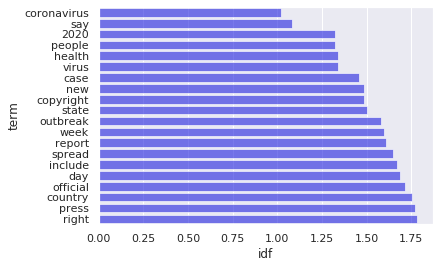

In [16]:
vectorizer = TfidfVectorizer(lowercase = True, stop_words = 'english', analyzer = 'word')

tfidf = vectorizer.fit_transform(df['doc_lemma'])
# print(vectorizer.vocabulary_)
idf = pd.DataFrame(list(zip(vectorizer.get_feature_names(), vectorizer.idf_)),
                 columns = ['term', 'idf'])
sns.barplot(x= 'idf', y= 'term', color = 'blue', alpha = 0.6, data = idf.sort_values(by = 'idf').iloc[:20, :]);

In [17]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tfidf[1]
 
#print the scores
tfidf_df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
tfidf_df.sort_values(by=["tfidf"],ascending=False).head(10)

,tfidf
yuen,0.268658
sars,0.184623
kong,0.175890
hong,0.174788
hub,0.165514
wuhan,0.152301
bat,0.132436
suffer,0.131561
wang,0.129441
coronaviruses,0.124783


In [18]:
tfidf_df = pd.DataFrame(tfidf.toarray())
TFIDF = pd.concat([df[['doc_id']], tfidf_df], axis = 1)
TFIDF.head()
# TFIDF.to_csv('TFIDF.csv', index = False)

,doc_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,...,36117,36118,36119,36120,36121,36122,36123,36124,36125,36126,36127,36128,36129,36130,36131,36132,36133,36134,36135,36136,36137,36138,36139,36140,36141,36142,36143,36144,36145,36146,36147,36148,36149,36150,36151,36152,36153,36154,36155,36156,36157,36158,36159,36160,36161,36162,36163,36164,36165,36166,36167,36168,36169,36170,36171,36172,36173,36174,36175,36176,36177,36178,36179,36180,36181,36182,36183,36184,36185,36186,36187,36188,36189,36190,36191,36192,36193,36194,36195,36196,36197,36198,36199,36200,36201,36202,36203,36204,36205,36206,36207,36208,36209,36210,36211,36212,36213,36214,36215,36216,36217,36218,36219,36220,36221,36222,36223,36224,36225,36226,36227,36228,36229,36230,36231,36232,36233,36234,36235,36236,36237,36238,36239,36240,36241,36242,36243,36244,36245,36246,36247,36248,36249,36250,36251,36252,36253,36254,36255,36256,36257,36258,36259,36260,36261,36262,36263,36264,36265,36266,36267,36268,36269,36270,36271,36272,36273,36274,36275,36276,36277,36278,36279,36280,36281,36282,36283,36284,36285,36286,36287,36288,36289,36290,36291,36292,36293,36294,36295,36296,36297,36298,36299,36300,36301,36302,36303,36304,36305,36306,36307,36308,36309,36310,36311,36312,36313,36314,36315,36316,36317,36318,36319,36320,36321,36322,36323,36324,36325,36326,36327,36328,36329,36330,36331,36332,36333,36334,36335,36336,36337,36338,36339,36340,36341,36342,36343,36344,36345,36346,36347,36348,36349,36350,36351,36352,36353,36354,36355,36356,36357,36358,36359,36360,36361,36362,36363,36364,36365,36366
0,983556,0.0,0.021115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Sentiment analysis - NRC Emotional Lexicon

WHO announced coronavirus as world pandemic on March 16, 2020. To see the influence of the annoucement, I analyze the sentiment of news articles during the time period. NRC Emotional Lexicon include sentiment value for each term. To see sentiment variation each day, We can calculate the sentimet by multiplying the score of each sentiment with occur frequency in each day and take the mean.

In [9]:
SALEX = pd.read_csv('salex_nrc.csv').set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]
SALEX['polarity'] = SALEX.positive - SALEX.negative
SALEX.head()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1


### Combine SALEX with VOCAB

In [34]:
def merge_salex(df, col):
    date_df_3 = df.groupby('doc_date').agg({col : lambda x: ','.join(x)}).reset_index() # aggregate document based on date
    # tokenizing
    stop_words = set(stopwords.words('english')) # remove stop words
    tokenizer = nltk.RegexpTokenizer(r"\w+") # remove punctuation

    date_df_3['tokenize'] = 0

    for i in range(len(date_df_3)):
        rm_words = tokenizer.tokenize(date_df_3[col][i].lower()) 
        date_df_3['tokenize'][i] = [w for w in rm_words if not w in stop_words] 
    
    selex_df = date_df_3[['doc_date','tokenize']].explode('tokenize') # seperate token list to rows
    selex_df.rename(columns = {'tokenize':'term_str'}, inplace = True)
    selex_df.reset_index(drop = True, inplace = True)
    
    
    V = pd.DataFrame()
    for i in list(selex_df['doc_date'].unique()): # join document by date
        s = selex_df[selex_df['doc_date'] == i].groupby('term_str').count()
        s.columns = ['term_count']
        s['doc_date'] = i
        S = pd.concat([s, SALEX], join='inner', axis=1) # join salex by word
        V = V.append(S)
        
    V_m = V.copy()
    for i in list(V_m.columns)[2:]:
        V_m[i] = V_m[i] * V_m['term_count'] # multiply term frequnecy (add higher weight to more frequent word)
    return V_m



### Sentiment Analysis based on document per day

In [49]:
V_m_doc = merge_salex(df, 'doc_lemma')
V_m_doc.head()

,term_count,doc_date,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
term_str,,,,,,,,,,,,,
accord,1,2020-01-08,0,0,0,0,0,0,1,0,0,1,1
achievement,1,2020-01-08,0,1,0,0,1,0,1,0,0,1,1
advise,2,2020-01-08,0,0,0,0,0,0,2,0,0,2,2
associate,1,2020-01-08,0,0,0,0,0,0,1,0,0,1,1
authority,4,2020-01-08,0,0,0,0,0,0,4,0,0,4,4


In [50]:
# get each sentiment mean value for each day
V_m_doc_date = V_m.reset_index().groupby('doc_date').mean()
V_m_doc_date.tail().style.background_gradient(cmap='YlGn', high=.25) 

,term_count,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
doc_date,,,,,,,,,,,,
2020-03-24,7.59685,1.56174,2.18644,0.911622,3.32567,1.16949,3.58596,3.68644,2.34746,0.923729,3.16586,0.100484
2020-03-25,7.22588,1.5307,2.15351,1.05592,3.07237,1.2193,3.47368,3.53728,2.48904,1.00768,3.03509,0.0635965
2020-03-26,9.06431,2.00725,2.58967,1.21105,3.69475,1.57518,4.30344,4.59873,2.79529,1.20109,3.97917,0.29529
2020-03-27,8.21348,1.55169,2.46404,1.13708,3.53708,1.35955,3.86404,4.0764,2.66742,1.08876,3.58764,0.21236
2020-03-28,3.6125,0.8375,1.1325,0.3725,1.3075,0.7825,1.7275,1.9225,1.085,0.5175,1.7,0.195


### Sentiment Analysis based on news title per day

In [42]:
def plot_sentiments(df, emo, title):   
    df[emo].plot(linewidth=3, **FIG)
    plt.title(str(title) + ' Sentiment Trend')
    plt.xlabel('Date')

In [48]:
V_m_title = merge_salex(df, 'title_lemma')

In [51]:
# get each sentiment mean value for each day
V_m_title_date = V_m_title.reset_index().groupby('doc_date').mean()
V_m_title_date.tail().style.background_gradient(cmap='YlGn', high=.25) 

,term_count,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
doc_date,,,,,,,,,,,,
2020-03-24,1.66667,0.566667,0.433333,0.333333,1.01111,0.233333,1.13333,0.433333,0.822222,0.344444,0.444444,-0.7
2020-03-25,1.61957,0.565217,0.5,0.369565,0.934783,0.217391,1.05435,0.521739,0.815217,0.271739,0.478261,-0.532609
2020-03-26,1.89781,0.50365,0.686131,0.364964,0.992701,0.350365,1.0292,0.79562,0.70073,0.291971,0.686131,-0.233577
2020-03-27,1.8125,0.53125,0.541667,0.333333,1.125,0.229167,1.14583,0.583333,0.84375,0.291667,0.5,-0.5625
2020-03-28,1.17241,0.448276,0.551724,0.172414,0.551724,0.344828,0.586207,0.551724,0.37931,0.206897,0.448276,-0.0344828


### Visualize

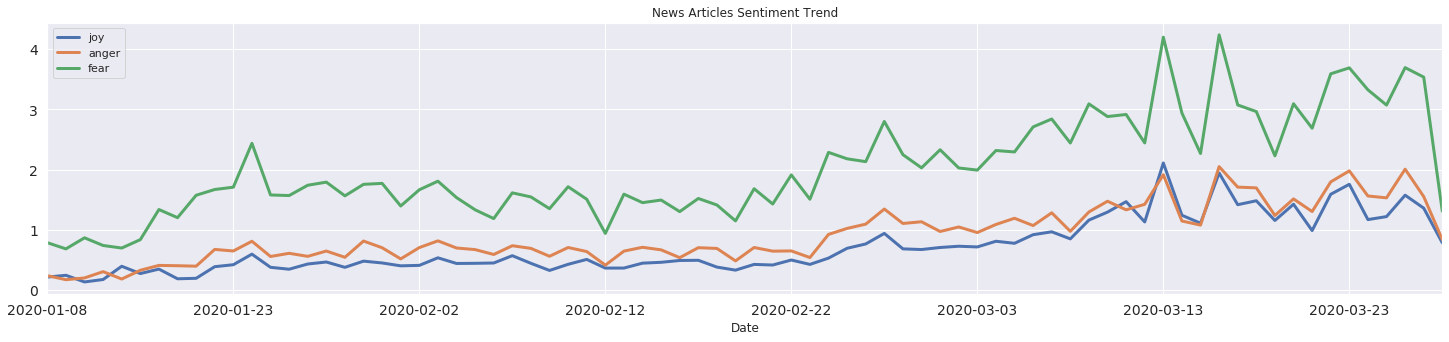

In [59]:
plot_sentiments(V_m_doc_date, ['joy', 'anger', 'fear'], 'News Articles')


Above is News Article context sentiment analysis, we can see March 16, 2020 is the peak of negative emotions and **fear** appears to be the most frequent emotions in the articles. And there is a clearly increase trend of those fear, which may indicates the people in the US has become more serious to COVID-19. Also, we can see the articles have a higher emotion in fear compare to joy. 

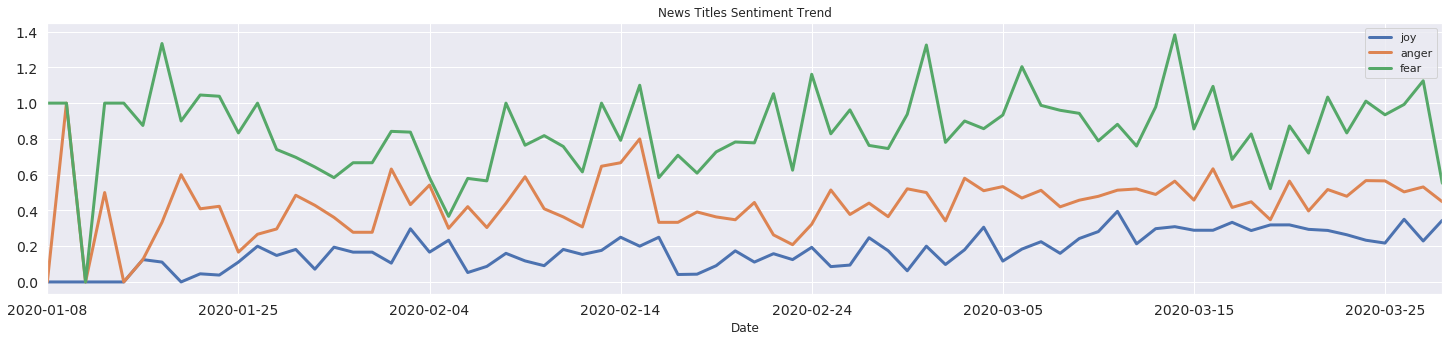

In [60]:
plot_sentiments(V_m_title_date, ['joy', 'anger', 'fear'], 'News Titles')

Above is sentiment analysis by news titles. News title is the summary of the context, and people may receive new information by only browsing the title. From the graph above, we can see emotion in articles like **fear, anger** is more than **joy**, which represent the public are facing a harder time and people are feeling fear and angry for the situation.

## Sentiment analysis - TextBlob
1. See sentiment difference among time

    - The polarity score is within the range of [-1, 1]. Negative value indicates negative text and positive indicate the text is positive.
    - The subjectivity is within the range of [0, 1], where 0 is very objective and 1 is very subjective


In [30]:
sentiment_org = pd.DataFrame()
for i in range(len(df)):
    
    blob1 = TextBlob(df['doc_content'][i])
    sentiment_org = sentiment_org.append(pd.DataFrame([blob1.sentiment]))
    
sentiment_org.reset_index(drop = True, inplace = True)


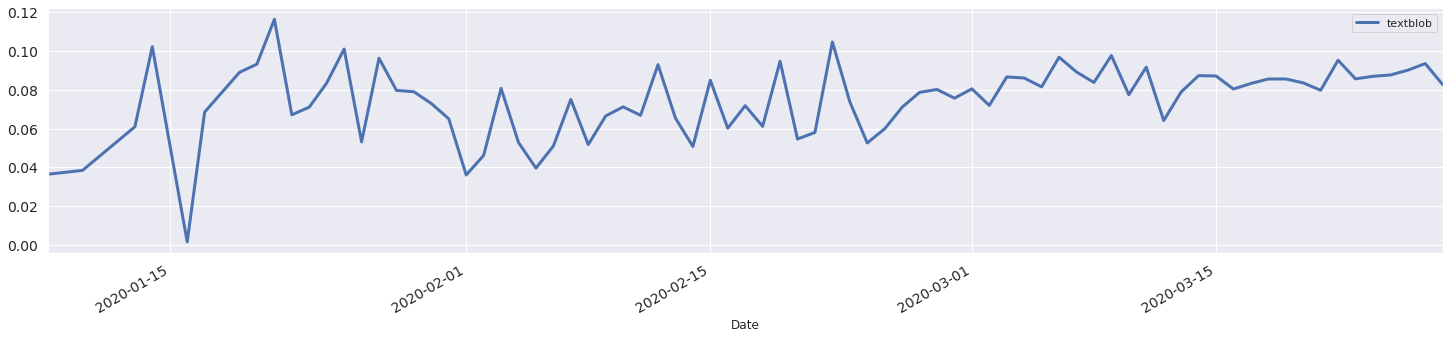

In [31]:
s_df = pd.concat([df[['doc_source', 'doc_date']], sentiment_org], axis = 1, sort = False).reset_index(drop = True)
s_time = s_df.groupby('doc_date').agg({'polarity': 'mean'})

s_time['polarity'].plot(linewidth=3, label = 'textblob', **FIG);
plt.xlabel('Date');


## Sentiment scoring with VADER
- Rating from : -1 (very negative) to 1 (very positive)

Reference: https://towardsdatascience.com/sentiment-analysis-beyond-words-6ca17a6c1b54

In [32]:
analyzer = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(text):
    score = analyzer.polarity_scores(text)
#     print(text)
    return score

def get_word_sentiment(text):
    
    tokenized_text = nltk.word_tokenize(text)
    
    pos_word_list=[]
    neu_word_list=[]
    neg_word_list=[]
    
    for word in tokenized_text:
        if (analyzer.polarity_scores(word)['compound']) >= 0.1:
            pos_word_list.append(word)
        elif (analyzer.polarity_scores(word)['compound']) <= -0.1:
            neg_word_list.append(word)
        else:
            neu_word_list.append(word)
#     print('Positive:',pos_word_list)        
#     print('Neutral:',neu_word_list)    
    return (neg_word_list)

In [33]:
# get_word_sentiment(df['doc_content'][0])
vader_org = pd.DataFrame()

for i in range(len(df)):
    
    vader_org = vader_org.append(pd.DataFrame([sentiment_analyzer_scores(df['doc_content'][i])]))

vader_org.reset_index(drop = True, inplace = True)


### How is the sentiment difference in US news articles during January and March?

From the graph below we can see that sentiment analysis using Textblob indicates a relatively neutral sentiment among news articles between the time period. Vader returns a negative sentiment among this time, and the news attitude has become more positive in March compare to January, which is strange since coronavirus outbreak in the US and global begins around March

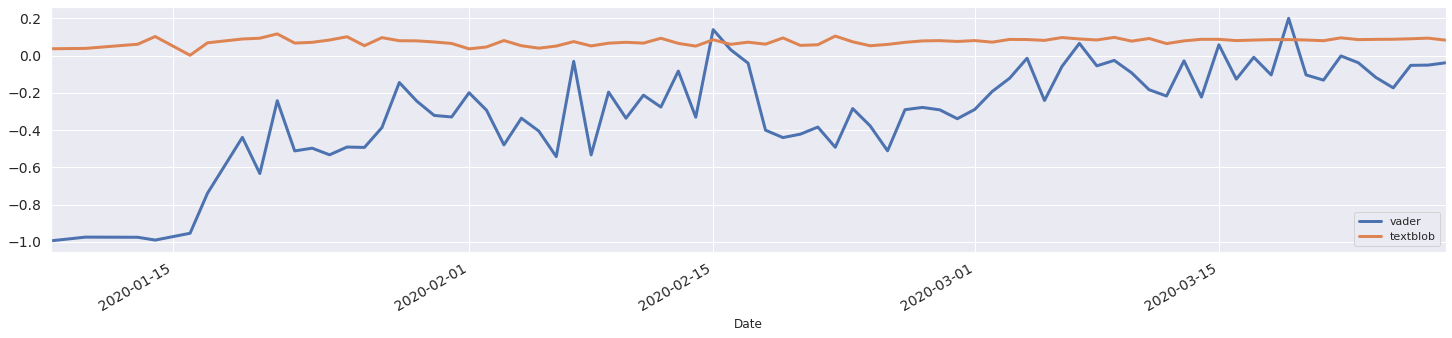

In [34]:
vader_df = pd.concat([df[['doc_source', 'doc_date']], vader_org], axis = 1, sort = False).reset_index(drop = True)
v_time = vader_df.groupby('doc_date').agg({'compound': 'mean'})

ax = v_time['compound'].plot(linewidth=3, label = 'vader', **FIG)
ax1 = s_time['polarity'].plot(linewidth=3, label = 'textblob', **FIG)
ax.set_xlabel('Date')

ax.legend();

## Word frequency among time
Please see [Tableau Visualization](https://public.tableau.com/profile/yiting6869#!/vizhome/text_mining_15878626195210/Dashboard1) for top 15 frequency words over January to March. We can see from January to mid Feburary, the news mainly focuses on China or other countries in Asia. As coronavirus spread widely in the world, especially in the US, the articles starts more focusing on reporting the status in the US. However, during this time, words like mask, disinfect or wash hands, which is important to alert people to protect themselves do not frequently be mentioned in the articles. 

In [35]:
text_df = df.groupby('doc_date').agg({'doc_lemma' : lambda x: ','.join(x),
                                     'doc_id': 'count'}).reset_index()
text_df.rename(columns = {'doc_id': 'doc_count'}, inplace = True)
text_df.head()

,doc_date,doc_lemma,doc_count
0,2020-01-08,yanan wang mike stobbe beijing ( ap ) — prelim...,1
1,2020-01-10,beijing ( ap ) — health authority central chin...,1
2,2020-01-13,"late health medical news development , compile...",1
3,2020-01-14,"late health medical news development , compile...",1
4,2020-01-16,"mari yamaguchi , associate press tokyo ( ap ) ...",1


In [36]:
freq_word_doc = pd.DataFrame()
for i in range(len(text_df)):
    rm_words = tokenizer.tokenize(text_df['doc_lemma'][i].lower())  # remove punctuation
    filtered_sentence = [w for w in rm_words if not w in stop_words]  # remove stop words

    freq = Counter(filtered_sentence)
    f_df = pd.DataFrame(freq.most_common(),columns=['word', 'count']) 
    f_df['doc_date'] = text_df['doc_date'][i] 
    f_df['doc_count'] = text_df['doc_count'][i] 
    freq_word_doc = freq_word_doc.append(f_df)

freq_word_doc.reset_index(drop = True, inplace = True)
freq_word_doc['word_freq'] = freq_word_doc['count'] / freq_word_doc['doc_count']

In [40]:
# freq_word_doc.to_csv('freq_word_doc_v2.csv', index = False)

In [41]:
freq_word_doc.head()

,word,count,doc_date,doc_count,word_freq
0,say,10,2020-01-08,1,10.0
1,wuhan,9,2020-01-08,1,9.0
2,patient,9,2020-01-08,1,9.0
3,health,7,2020-01-08,1,7.0
4,report,7,2020-01-08,1,7.0


## Show word frequency
Show word frequency change during this time period. 

As we can see, **home, test and distance** has been increasingly mentioned during the time since people became aware that staying home and keeping social distance is the best way to protect ourselves and others. As the outbreak of coronavirus in the US and to the global was around mid-March, the social media also started telling people to better stay at home frequently at that time. Also the frequency of **test** increased in March, which reflects the needs for COVID-19 test. 

**Masks** have been mentioned frequently on May 20, 2020, which is because the FBI ordered masks in case of the pandemic, many people started wearing masks outdoors, and people started trying to make homemade masks because of the lack of masks in the market. 

In [38]:
def draw_word_freq(word_list):
    
    for i in word_list:
        a = freq_word_doc[freq_word_doc['word'] == i]
        a.set_index(['doc_date'], inplace = True)
        a['word_freq'].plot(linewidth=3, label = str(i), **FIG)

  

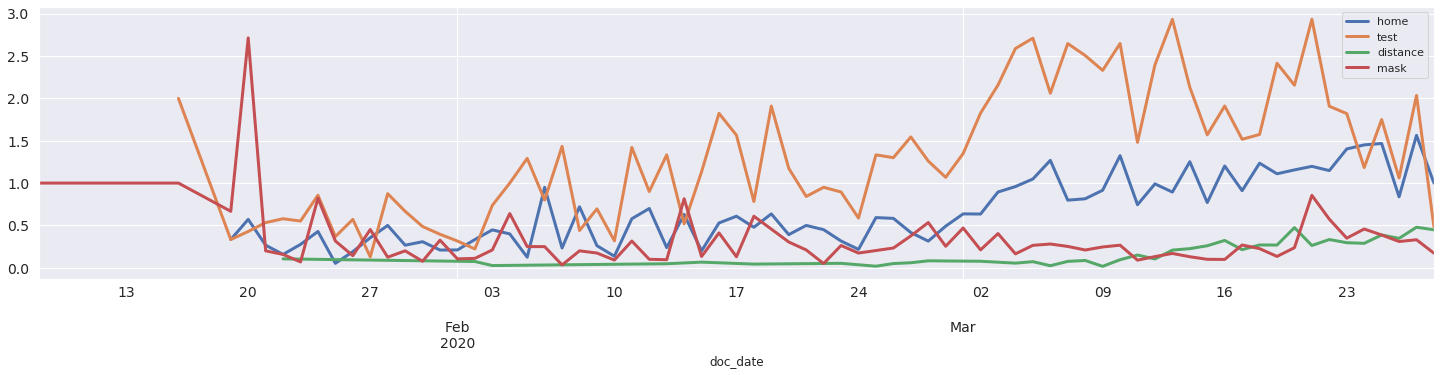

In [115]:
draw_word_freq(['home', 'test', 'distance', 'mask'])

### Get word importance
Get top 20 word importance each day. From [Tableau visualization](https://public.tableau.com/shared/HKGZC6CM5?:display_count=y&:origin=viz_share_link), we can see in January, the important words are more associated with China, Wuhan. Flight, passenger and outbreak are also ranked as high important words from late January to mid February since the coronavirus outbreak in Asia during that time. As the outbreak happened in Wuhan, many countries sent airplanes to save their citizens back to their country and many policies were given for airlines to protect the people. Also, airplanes have been a dangerous place that people get easily affected. 

From the end of February, Trump has popped up as an important word showing that the U.S. started taking action, however, the appearance of Trump does not decrease the fear of the public based on the sentiment analysis in news articles. But it should be also known that COVID-19 started spreading widely in the U.S. in March, and it may also be the reason people started taking COVID-19 into serious and knowing how dangerous this situation is now.

In [71]:
vectorizer = TfidfVectorizer(lowercase = True, stop_words = 'english', analyzer = 'word')
date_tfidf = vectorizer.fit_transform(text_df['doc_lemma'])
feature_names = vectorizer.get_feature_names()

In [89]:
word_imp = pd.DataFrame()

for i, d in zip(range(date_tfidf.toarray().shape[0]), (list(text_df['doc_date'].unique()))):
    #get tfidf vector for first date
    document_vector=date_tfidf[i]
    #print the scores
    date_tfidf1 = pd.DataFrame(document_vector.T.todense(), index=feature_names, columns=["tfidf"])
    date_tfidf1.sort_values(by=["tfidf"],ascending=False, inplace = True)
    date_tfidf1['doc_date'] = d
    word_imp = word_imp.append(date_tfidf1.head(20))

In [94]:
word_imp.reset_index(inplace = True)
word_imp.rename(columns = {'index':'term'}, inplace = True)
word_imp.head()

,term,tfidf,doc_date
0,say,0.259044,2020-01-08
1,wuhan,0.236187,2020-01-08
2,patient,0.233140,2020-01-08
3,galea,0.205034,2020-01-08
4,health,0.181331,2020-01-08


In [95]:
# word_imp.to_csv('word_imp.csv', index = False)